# 📝 Task 2: Exploratory Data Analysis (EDA)

In this task, we aim to explore and understand the House Price Dataset in detail.
The focus is on uncovering data patterns, identifying relationships, and preparing the dataset for further predictive analysis.

**Objectives of this task:**

* Perform an initial understanding of dataset structure, features, and data types.

* Clean the dataset by handling missing values, duplicates, and inconsistencies.

* Generate descriptive statistics and summary reports.

* Create exploratory plots to understand distributions and correlations.

* Derive meaningful insights that will help in model building and decision-making.

**Dataset Used:**

* Raw House Price Dataset (later cleaned and used for visualizations).

# Key Questions to Explore in the Dataset

**1. What is the distribution of house prices, and is it skewed or affected by outliers?**

**2. How does the living area (size of the house) relate to house price?**

**3. Do the number of bedrooms and bathrooms significantly impact the price?**

**4. Are houses located near waterfronts or with better views priced higher?**

**5. How do location factors (Postal Code, Latitude/Longitude, distance from airport) influence price?**

**6. Do newer or recently renovated houses tend to have higher prices than older ones?**

**7. What role do external factors (number of schools nearby, lot area) play in determining price?**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Description

The dataset used for this task is House Price India.csv, which contains real estate property details from an Indian housing market. Each record represents a residential property with attributes related to its physical characteristics, location details, and sale price.

* **Dataset Name:** House Price India.csv
* **Number of Records:** ~21,000 (rows)
* **Number of Features:** 21 (columns)

**Key Columns in the Dataset:**
* **Price:** Target variable (property selling price in INR).
* **Number of Bedrooms / Bathrooms:** Measures the size and capacity of the property.
* **Living Area, Lot Area:** Size of the house and surrounding land.
* **Waterfront Present, Number of Views:** Qualitative features affecting price.
* **Condition & Grade of the House:** Overall quality of the property.
* **Year Built, Renovation Year:** Construction details.
* **Postal Code, Latitude, Longitude:** Location identifiers.
* **Number of Schools Nearby, Distance from Airport:** Neighborhood and connectivity features.

# Data Cleaning Summary
The raw dataset was subjected to preprocessing and cleaning to ensure accuracy and consistency for analysis:

* **Missing Values:** Identified and appropriately handled (either imputed or removed based on context).
* **Duplicate Records:** Removed to avoid bias in analysis.
* **Irrelevant Columns:** Features such as id and date were dropped since they do not contribute meaningfully to price prediction.
* **Outlier Detection:** Extreme values were identified in features like Price, Living Area, and Bedrooms. These represent luxury properties and need careful handling in modeling.
* **Data Encoding:** Converted categorical variables (e.g., waterfront presence) into numeric format for future modeling.
* **Feature Scaling:** Recommended for numerical features (such as living area and lot size) due to large differences in value ranges.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

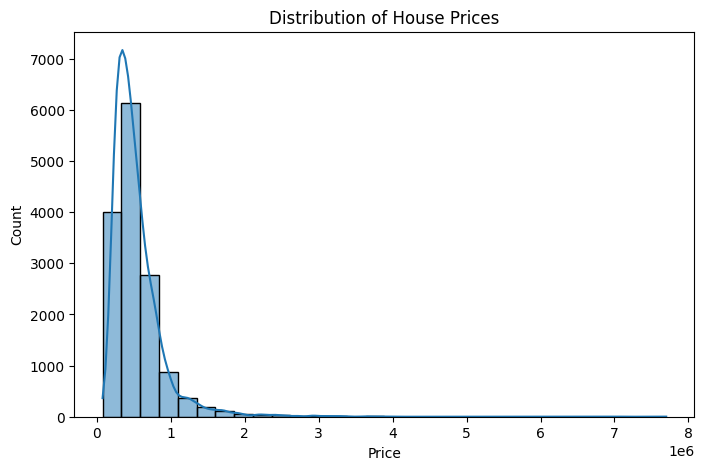

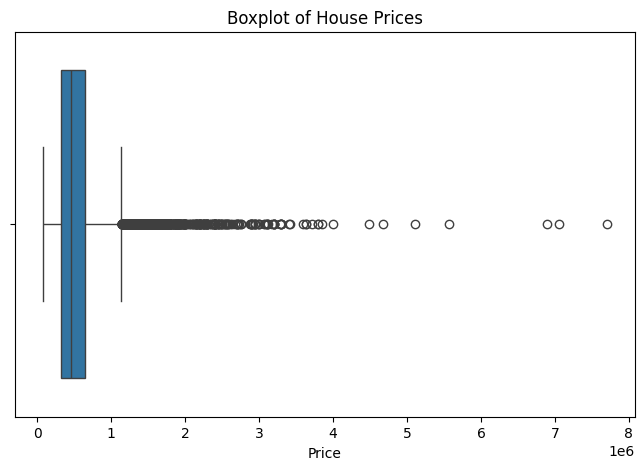

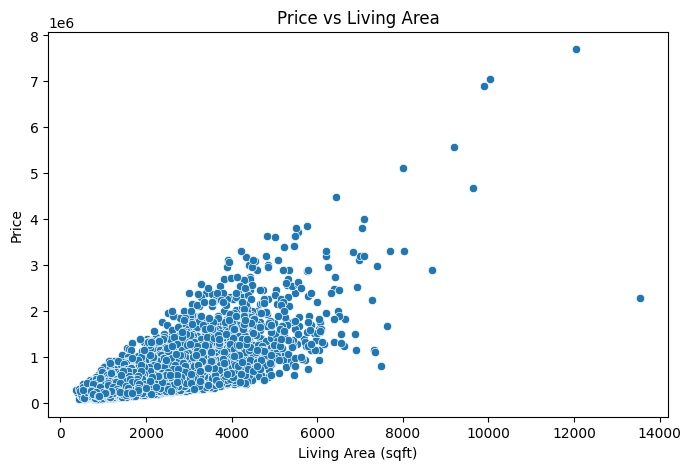

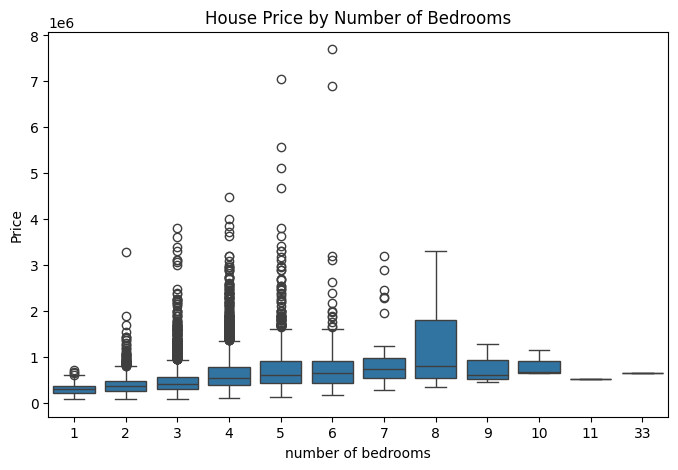

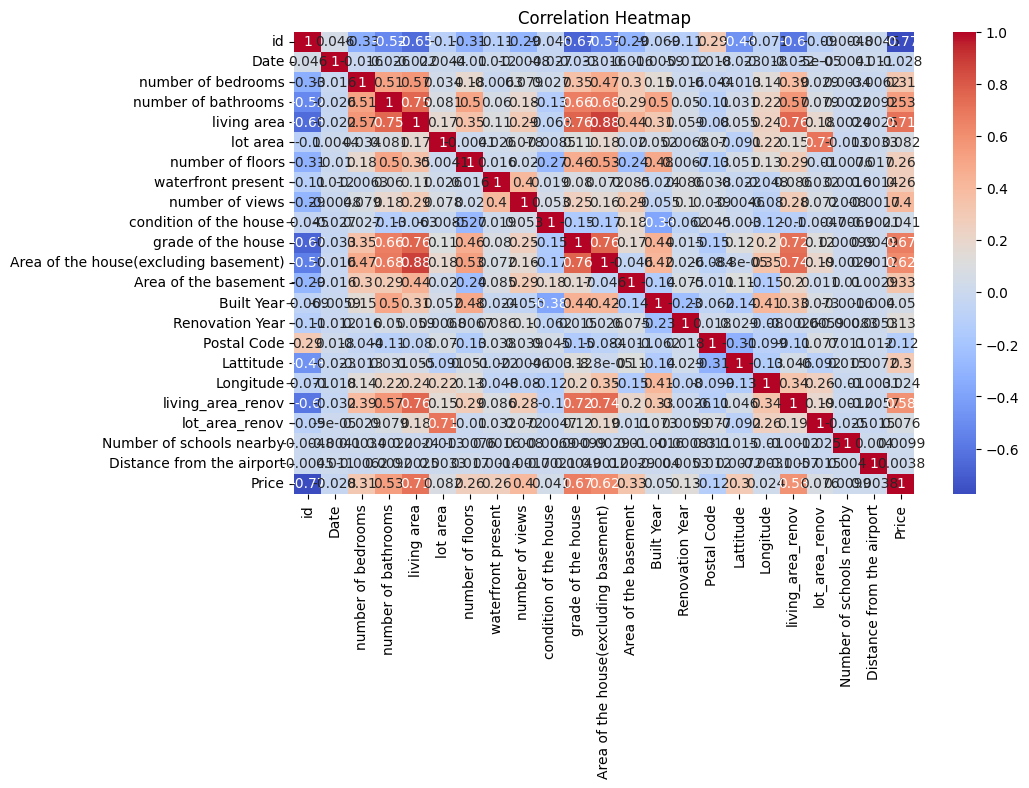

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# import libraries
#!pip install pandas numpy matplotlib seaborn ydata-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Dataset
data = pd.read_csv('/content/House Price India.csv')

# Initial Data Exploration
data.head(10)
data.info()

# Checking basic statistics
# Summary stats
print(data.describe())

# Check missing values
print(data.isnull().sum())

# Univariate analysis
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Price'])
plt.title("Boxplot of House Prices")
plt.show()

# Bivariate analysis
# Scatter plot: Price vs Living Area
plt.figure(figsize=(8,5))
sns.scatterplot(x='living area', y='Price', data=data)
plt.title("Price vs Living Area")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.show()


# Boxplot: Price by Number of bedrooms Bedrooms
plt.figure(figsize=(8,5))
sns.boxplot(x='number of bedrooms', y='Price', data=data)
plt.title("House Price by Number of Bedrooms")
plt.show()

# Correlation analysis
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Save cleaned dataset
data.to_csv("Cleaned_HousePrice.csv", index=False)

# Download cleaned dataset
from google.colab import files
files.download("Cleaned_HousePrice.csv")


#  Data Visualization and Insights
**Distribution of House Prices**
*  The distribution of house prices is right-skewed, with most properties priced below 1 million.
* A small proportion of luxury properties significantly inflate the upper range of prices.

**Boxplot of House Prices**
* Confirms the presence of outliers (luxury homes).
* Median house price lies much lower than the extreme maximum values.

**Scatter Plot: Price vs Living Area**
* A clear positive correlation exists: larger living areas generally lead to higher prices.
* However, very large houses show diminishing returns, suggesting other factors (e.g., location, grade) play a role.

**Boxplot: Price vs Number of Bedrooms**
* House prices tend to rise with the number of bedrooms.
* Relationship is not strictly linear—beyond 6–7 bedrooms, price variation becomes very wide due to luxury outliers.

**Correlation Heatmap**
* Strongest positive correlations with Price:

-Living Area (0.70)

-Grade of the House (0.67)

-Number of Bathrooms (0.53)

* Negative correlations:

-Longitude (-0.40) and Latitude (-0.28), confirming the role of location in house pricing.

# Key Findings and Conclusion

1. The dataset is clean and well-prepared for predictive analysis.

2. Living Area, Grade, Number of Bathrooms, and Location (lat-long) are the most significant predictors of house price.

3. Number of Bedrooms alone is not a reliable predictor—price is strongly influenced by property condition and neighborhood.

4. Outliers (extremely high prices and very large houses) are present and should be carefully addressed in predictive modeling.

5. Overall, the EDA highlights that property size, quality (grade), and location are the dominant drivers of house prices.